In [1]:
from qiskit import *

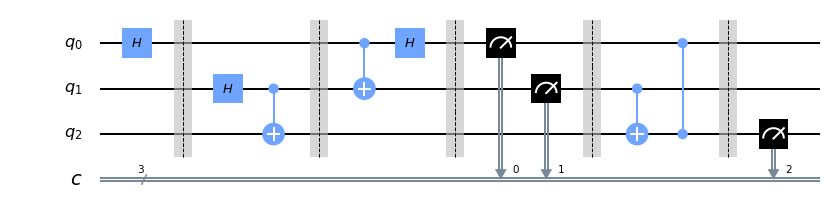

In [6]:
# the q0 is the state we want to teleport to bob
# q1 is alice's half of the bell's pair
# q2 is bob's half of the bell's pair that is where we want to teleport
circuit = QuantumCircuit(3, 3) # 3 qubits and 3 bits
# step 0 changing the state of q0 from 0 to the desired state
circuit.h(0)
circuit.barrier() # just a visual aid
# step 1 Doing entanglement between alice and bob's half of bell's pair
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
# step 2 Creating the three entagled body system
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
# step 3 measuring alice's pair and converting them into cbits
circuit.measure([0,1], [0,1])
circuit.barrier()
# step 4 once the measurement is done we want to perform two operation before measuring
# phase flip gate & controlled not gate
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()
# step 5 measurement of q2 to end process
circuit.measure([2], [2])
%matplotlib inline
circuit.draw(initial_state=True, output='mpl')

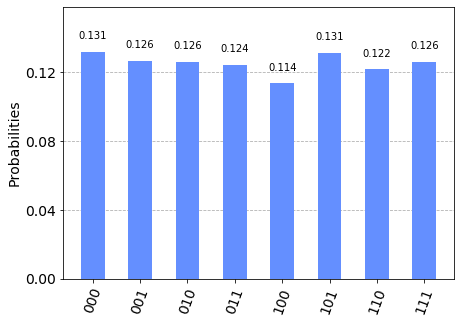

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=2048).result()
qiskit.visualization.plot_histogram(result.get_counts(circuit))